In [50]:
#!pip install --user imblearn

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
import imblearn

ModuleNotFoundError: No module named 'imblearn'

data source : 
https://www.kaggle.com/shrutimechlearn/churn-modelling

* is Gender, Age affect Churn
* what are the most determinants for the churn

In [26]:
data_path = 'C:\\Users\\oumou\\PycharmProjects\\Udacity\\DSBP\\data\\churn-modelling\\'

In [27]:
data = pd.read_csv(data_path + 'Churn_Modelling.csv')
print(data.shape)
data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [28]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [29]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

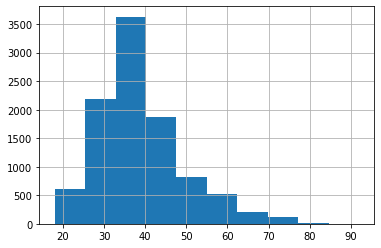

In [32]:
data.Age.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x225d4839888>,
 'caps': [<matplotlib.lines.Line2D at 0x225d4839d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x225d4830fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x225d483fe88>],
 'fliers': [<matplotlib.lines.Line2D at 0x225d483fe08>],
 'means': []}

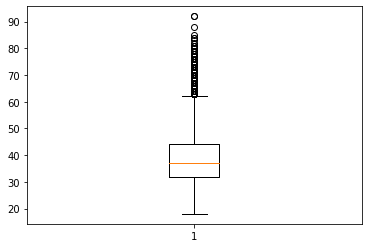

In [55]:
plt.boxplot(x=data['Age'])

#### Handle missing data

In [33]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

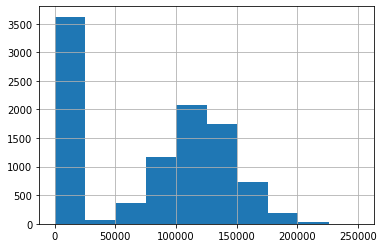

In [39]:
data.Balance.hist()

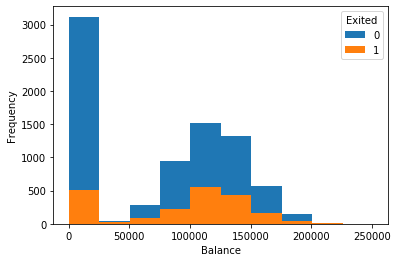

In [44]:
# pivot and plot
data.pivot(columns="Exited", values="Balance").plot.hist() # hist(bins=100)
plt.xlabel('Balance')
plt.show()

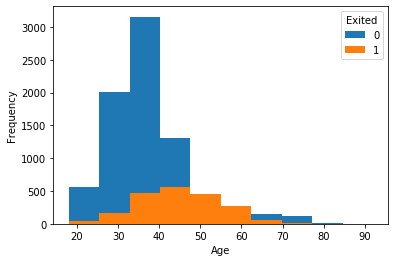

In [45]:
# pivot and plot
data.pivot(columns="Exited", values="Age").plot.hist() # hist(bins=100)
plt.xlabel('Age')
plt.show()

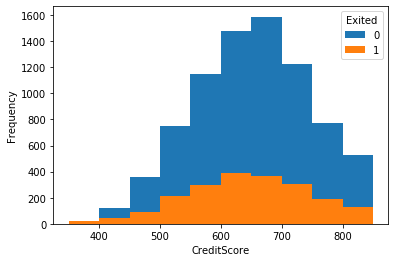

In [46]:
# pivot and plot
data.pivot(columns="Exited", values="CreditScore").plot.hist() # hist(bins=100)
plt.xlabel('CreditScore')
plt.show()

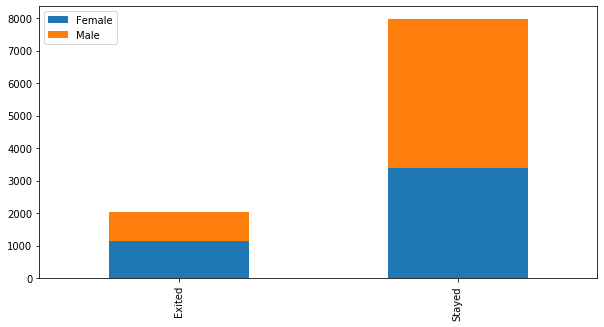

In [65]:
def bar_chart(feature,input_df):
    Exited = input_df[input_df['Exited']==1][feature].value_counts()
    Stayed = input_df[input_df['Exited']==0][feature].value_counts()
    df = pd.DataFrame([Exited,Stayed])
    df.index = ['Exited','Stayed']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

bar_chart("Gender",data)

In [ ]:
Males tend to stay a bit more, so do active members, no strong bias for geography
quite strong correlation with age and balance
hot encode Gender and Geography
drop Rownumber , customer Id surname,

#### Handle categorical

In [12]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

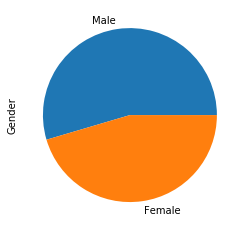

In [51]:
data.Gender.value_counts().plot.pie()

In [14]:
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__France,Geography__Germany,Geography__Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [11]:
def handle_categorical_data(df, col):
    """
    INTPUT 
    df - dataframe
    col - string : categorical column
    
    OUTPUT
    df = dataframe with dummies and col deleted
    """
    
    df_dummies = pd.get_dummies(df[col], prefix=col)
    df = df.join(df_dummies)
    df.drop(col,axis=1, inplace=True)
    return df

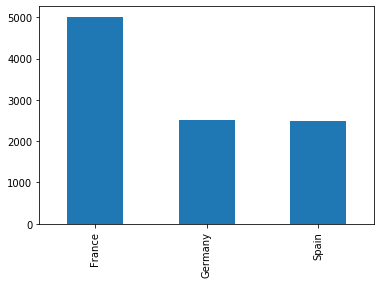

In [53]:
data.Geography.value_counts().plot.bar()

In [10]:
data = handle_categorical_data(data, 'Geography')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography__France,Geography__Germany,Geography__Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [13]:
data.dtypes

longitude                      float64
latitude                       float64
housing_median_age             float64
total_rooms                    float64
total_bedrooms                 float64
population                     float64
households                     float64
median_income                  float64
median_house_value             float64
ocean_proximity__<1H OCEAN       uint8
ocean_proximity__INLAND          uint8
ocean_proximity__ISLAND          uint8
ocean_proximity__NEAR BAY        uint8
ocean_proximity__NEAR OCEAN      uint8
dtype: object

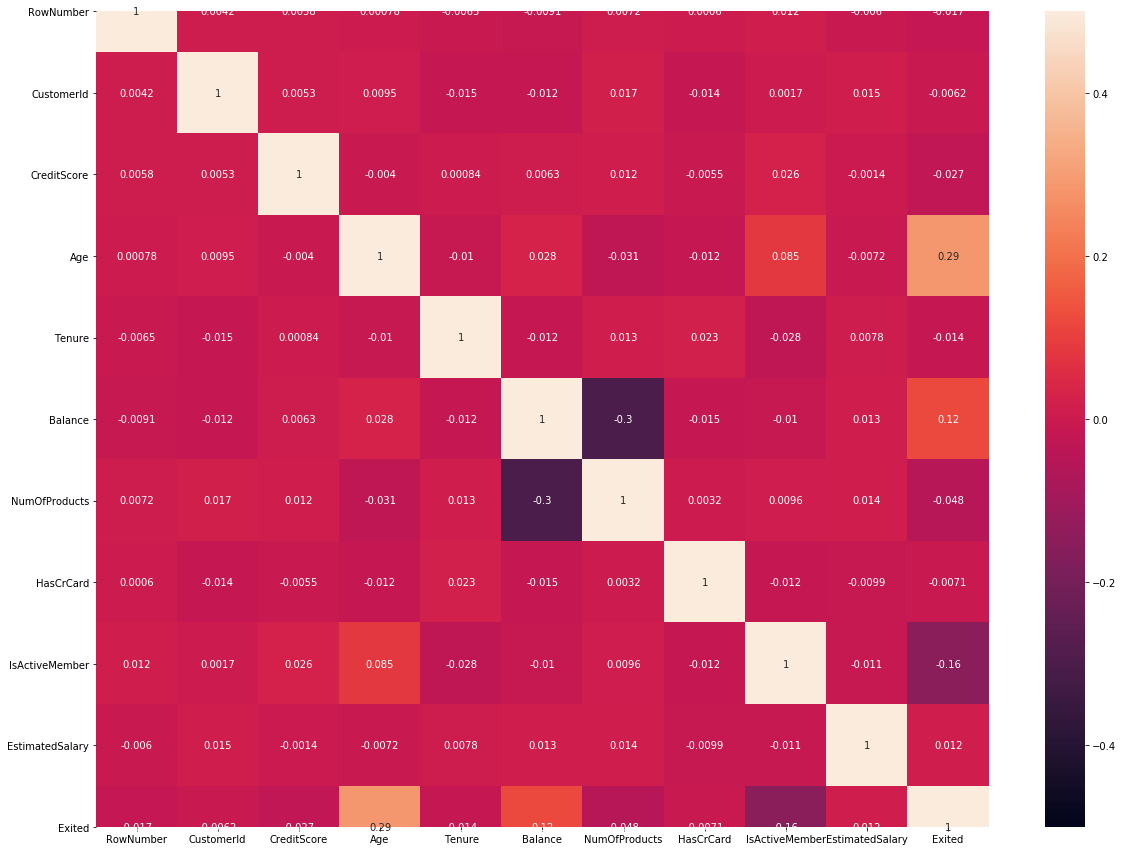

In [67]:
import seaborn as sns
corr =data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot = True, vmin= -0.5, vmax = 0.5)

### train/test split

In [14]:
X,y = data.drop('Exited',axis=1), data.Exited

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### benchmark

In [26]:
y_pred = [0] * len(y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 90578.72985251456
Mean Squared Error: 13125401078.138632
Root Mean Squared Error: 114566.14280902814


### modelisation

In [23]:
model = DecisionTreeClassifier()

In [ ]:
confusion_matrix = confusion_matrix(y_true, y_pred)
confusion_matrix

In [ ]:
sns.heatmap(confusion_matrix, annot = True, fmt='g')


In [ ]:
# Confusion matrix for visulalization of our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
lr_cm = confusion_matrix(y_test, y_pred0)

#Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')


array([-58559.50286921, -54393.3264811 , -54361.18710542, -55798.28517072,
       -47726.51311388])

In [19]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50100.14616553783
Mean Squared Error: 4730676245.231651
Root Mean Squared Error: 68779.91164018496


In [49]:
lr.score(X_train, y_train)

0.6470480227253683

In [ ]:
# normalize 

x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

deliverables :
* a Github repo 
* a blog post